# استيراد الوحدات المطلوبة

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import warnings
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ReduceLROnPlateau
warnings.filterwarnings("ignore")






 # تحميل البيانات

In [2]:
def load_image(image_path, img_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, img_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
d_path = "f:/oct-Processed"                         

x_data = []
y_data = []


for label_dir in os.listdir(d_path):
    if os.path.isdir(os.path.join(d_path, label_dir)):
        for fle in os.listdir(os.path.join(d_path, label_dir)):
            image_path = os.path.join(d_path, label_dir, fle)
            x_data.append(load_image(image_path))
            y_data.append(label_dir)


x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape[0], 'data samples')


4558 data samples


In [3]:

# استبدل `y_data` بمصفوفة أو قائمة التسميات في بياناتك
class_names = np.unique(y_data)  # الحصول على الفئات الفريدة
num_classes = len(class_names)   # حساب عدد الفئات

print("عدد الفئات في البيانات:", num_classes)
print("الفئات:", class_names)

np.random.seed(42)




عدد الفئات في البيانات: 3
الفئات: ['CRVO' 'DME' 'OTHER']


In [4]:
# خلط البيانات بشكل عشوائي
indices = np.random.permutation(len(x_data))
x_data = x_data[indices]
y_data = y_data[indices]

# تقسيم البيانات إلى 70% تدريب و 30% للتحقق والاختبار
x_train, x_temp, y_train, y_temp = train_test_split(
    x_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

# تقسيم الـ 30% إلى 15% تحقق و 15% اختبار
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# طباعة أحجام المجموعات الجديدة
print("New Training Data Shape:", x_train.shape, y_train.shape)
print("New Validation Data Shape:", x_val.shape, y_val.shape)
print("New Test Data Shape:", x_test.shape, y_test.shape)


New Training Data Shape: (3190, 128, 128, 3) (3190,)
New Validation Data Shape: (684, 128, 128, 3) (684,)
New Test Data Shape: (684, 128, 128, 3) (684,)


In [5]:
x_train1=x_train
y_train1=y_train
x_test1=x_test
y_test1=y_test
x_val1=x_val
y_val1=y_val

In [6]:
x_train=x_train1
y_train=y_train1
x_test=x_test1
y_test=y_test1
x_val=x_val1
y_val=y_val1

In [7]:

# استبدل `y_data` بمصفوفة أو قائمة التسميات في بياناتك
class_names = np.unique(y_train)  # الحصول على الفئات الفريدة
num_classes = len(class_names)   # حساب عدد الفئات

print("عدد الفئات في البيانات:", num_classes)
print("الفئات:", class_names)


عدد الفئات في البيانات: 3
الفئات: ['CRVO' 'DME' 'OTHER']


In [8]:
# توزيع الفئات في مجموعة التدريب
train_classes, train_counts = np.unique(y_train, return_counts=True)
print("\nDistribution in training set:")
for cls, count in zip(train_classes, train_counts):
    print(f"Class {cls}: {count} samples")

# توزيع الفئات في مجموعة التحقق
val_classes, val_counts = np.unique(y_val, return_counts=True)
print("\nDistribution in validation set:")
for cls, count in zip(val_classes, val_counts):
    print(f"Class {cls}: {count} samples")

# توزيع الفئات في مجموعة الاختبار
test_classes, test_counts = np.unique(y_test, return_counts=True)
print("\nDistribution in test set:")
for cls, count in zip(test_classes, test_counts):
    print(f"Class {cls}: {count} samples")



Distribution in training set:
Class CRVO: 1098 samples
Class DME: 1118 samples
Class OTHER: 974 samples

Distribution in validation set:
Class CRVO: 235 samples
Class DME: 240 samples
Class OTHER: 209 samples

Distribution in test set:
Class CRVO: 235 samples
Class DME: 240 samples
Class OTHER: 209 samples


# فحص مجموعة البيانات لدينا

In [9]:
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our val data: " + str(len(x_val)))
print ("Number of labels in our val data: " + str(len(y_val)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_val:" + str(x_val[0].shape))
print ("Labels in y_val:" + str(y_val.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (3190, 128, 128, 3)
Number of samples in our training data: 3190
Number of labels in our training data: 3190
Number of samples in our val data: 684
Number of labels in our val data: 684
Number of samples in our test data: 684
Number of labels in our test data: 684


Dimensions of x_train:(128, 128, 3)
Labels in x_train:(3190,)


Dimensions of x_val:(128, 128, 3)
Labels in y_val:(684,)


Dimensions of x_test:(128, 128, 3)
Labels in y_test:(684,)


# تصور مجموعة بيانات التدريب 

<Figure size 640x480 with 0 Axes>

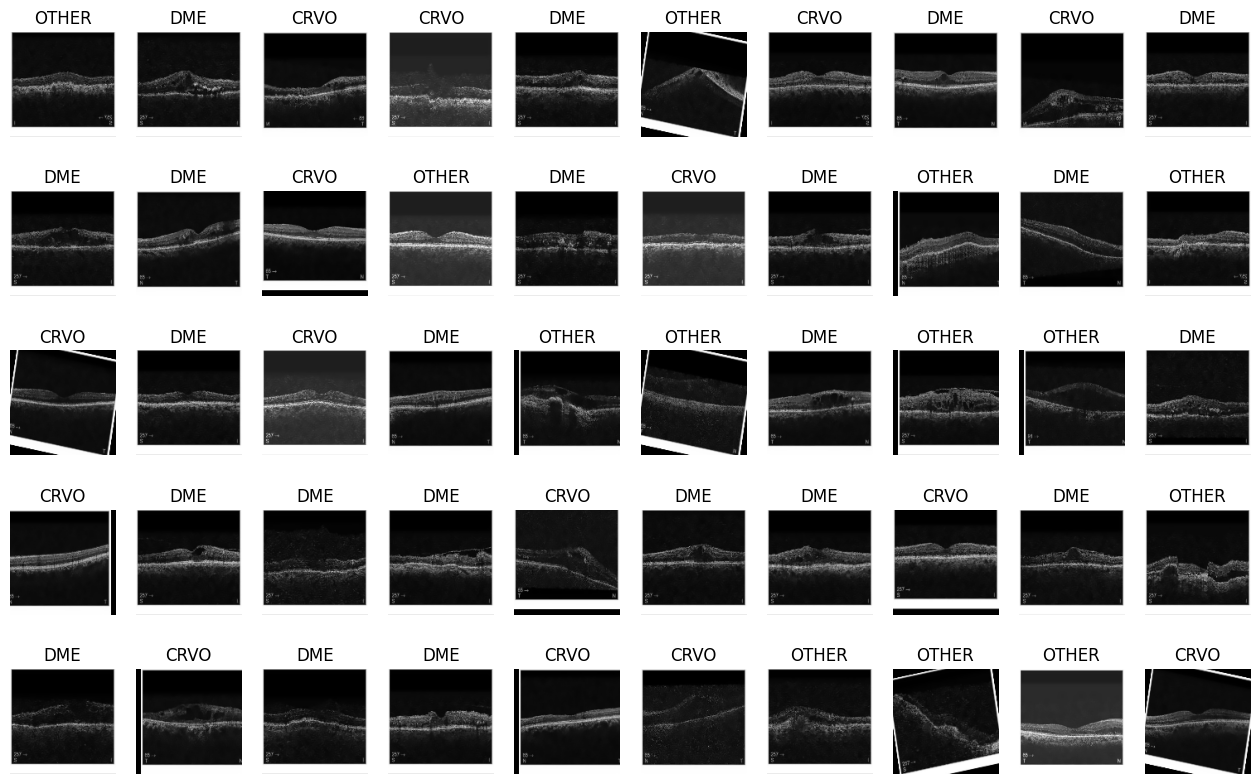

In [10]:
figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

# المعالجة الاولية للبيانات

In [11]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3190, 128, 128, 3)
3190 train samples
684 val samples
684 test samples


In [12]:


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.fit_transform(y_val)
y_test = label_encoder.fit_transform(y_test)

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# حساب توزيع الفئات في مجموعة التدريب

In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# تعريف LabelEncoder لتحويل الترميز إلى أسماء الفئات النصية
label_encoder = LabelEncoder()
label_encoder.fit(y_train1)  # تحويل أسماء الفئات النصية إلى أرقام
class_names = label_encoder.classes_  # أسماء الفئات النصية

# حساب توزيع الفئات في مجموعة التدريب
train_classes, train_counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print("Distribution in training set:")
for cls, count in zip(train_classes, train_counts):
    print(f"Class {cls} ({class_names[cls]}): {count} samples")

# حساب توزيع الفئات في مجموعة التحقق
val_classes, val_counts = np.unique(np.argmax(y_val, axis=1), return_counts=True)
print("\nDistribution in validation set:")
for cls, count in zip(val_classes, val_counts):
    print(f"Class {cls} ({class_names[cls]}): {count} samples")

# حساب توزيع الفئات في مجموعة الاختبار
test_classes, test_counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print("\nDistribution in test set:")
for cls, count in zip(test_classes, test_counts):
    print(f"Class {cls} ({class_names[cls]}): {count} samples")


Distribution in training set:
Class 0 (CRVO): 1098 samples
Class 1 (DME): 1118 samples
Class 2 (OTHER): 974 samples

Distribution in validation set:
Class 0 (CRVO): 235 samples
Class 1 (DME): 240 samples
Class 2 (OTHER): 209 samples

Distribution in test set:
Class 0 (CRVO): 235 samples
Class 1 (DME): 240 samples
Class 2 (OTHER): 209 samples


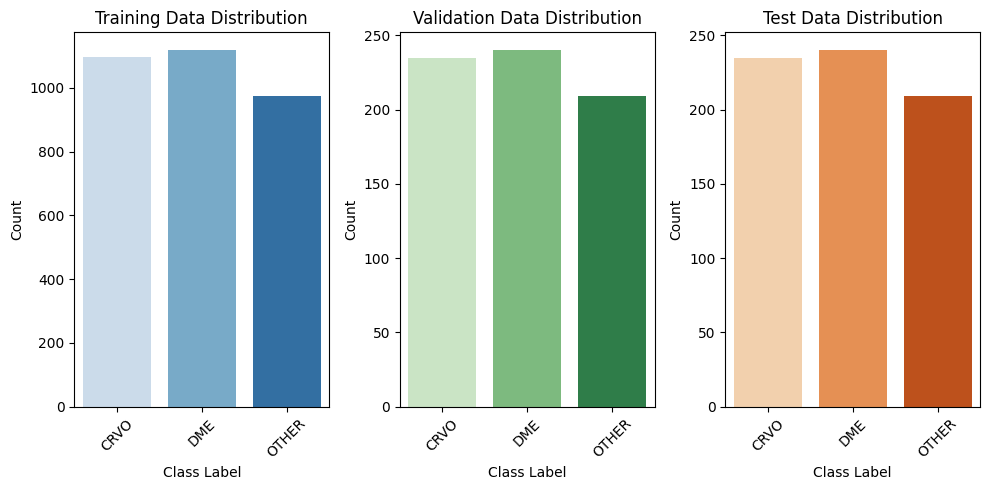

In [14]:


# تحويل التسميات إلى أرقام إذا لم تكن قد فعلت ذلك
y_train_labels1 = np.argmax(y_train, axis=1)
y_val_labels1 = np.argmax(y_val, axis=1)
y_test_labels1 = np.argmax(y_test, axis=1)

# إنشاء DataFrame للتوزيع
train_counts = pd.Series(y_train_labels1).value_counts().sort_index()
val_counts = pd.Series(y_val_labels1).value_counts().sort_index()
test_counts = pd.Series(y_test_labels1).value_counts().sort_index()

# استبدال الترميز بأسماء الفئات
train_counts.index = [class_names[i] for i in train_counts.index]
val_counts.index = [class_names[i] for i in val_counts.index]
test_counts.index = [class_names[i] for i in test_counts.index]

# رسم التوزيعات باستخدام seaborn
plt.figure(figsize=(10, 5))

# توزيع بيانات التدريب
plt.subplot(1, 3, 1)
sns.barplot(x=train_counts.index, y=train_counts.values, palette="Blues")
plt.title("Training Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)  # لتدوير أسماء الفئات إذا كانت طويلة

# توزيع بيانات التحقق
plt.subplot(1, 3, 2)
sns.barplot(x=val_counts.index, y=val_counts.values, palette="Greens")
plt.title("Validation Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)

# توزيع بيانات الاختبار
plt.subplot(1, 3, 3)
sns.barplot(x=test_counts.index, y=test_counts.values, palette="Oranges")
plt.title("Test Data Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(rotation=45)

# عرض الرسم
plt.tight_layout()
plt.show()


In [15]:
import random


random.seed(42)

np.random.seed(42)

tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

# بناء النموذج

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, 
                                     BatchNormalization, Activation, 
                                     Flatten, Dense, Dropout)
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=input_shape,
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2 Regularization
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), 
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3, 3), 
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3, 3), 
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), 
                 padding='same',
                 kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, 
                activation='relu',
                kernel_regularizer=tf.keras.regularizers.l2(0.0001)))  # <-- L2
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(num_classes, 
                activation='softmax',
                kernel_regularizer=tf.keras.regularizers.l2(0.0001)))   # <-- L2

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_18 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_19 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)       

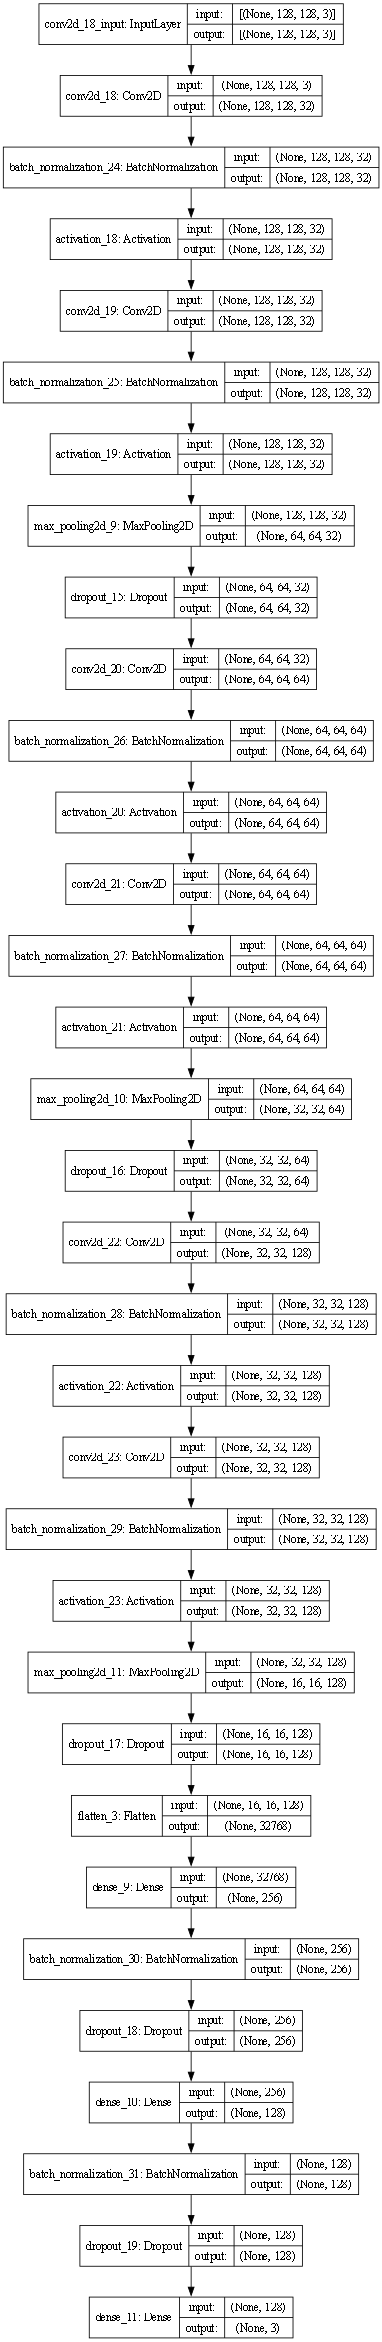

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(
    model, dpi=60,
    show_shapes=True
)

# تدريب النموذج على بيانات التدريب و التحقق

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

# تحويل تسميات التدريب إلى فئات
y_train_classes = np.argmax(y_train, axis=1)

# حساب أوزان الفئات مرة واحدة
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_classes),
    y=y_train_classes
)

# تحويل الأوزان إلى قاموس لاستخدامه مع Keras
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

# إعداد كولباك لتخفيض معدل التعلم عند عدم تحسن الأداء


# إعداد كولباك لحفظ أفضل نموذج فقط عند تحسن val_accuracy
checkpoint = ModelCheckpoint(
    'best_model_1.h5',  # اسم الملف لحفظ النموذج
    monitor='val_accuracy',  # المتغير الذي سيتم مراقبته
    save_best_only=True,  # يحفظ النموذج فقط إذا تحسنت الدقة
    mode='max',  # لأننا نريد أعلى قيمة لـ val_accuracy
    verbose=1  # طباعة رسالة عند حفظ النموذج
)

# **تأكد من تعريف final_model قبل استدعاء fit()**
# final_model = بناء النموذج هنا

# تدريب النموذج مع أوزان الفئات المحسوبة مسبقًا
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=125,
    validation_data=(x_val, y_val),
    class_weight=class_weight_dict,  # يتم تثبيت الأوزان هنا
    verbose=1,
    callbacks=[ checkpoint]  # إضافة كولباك لحفظ أفضل نموذج
)

# تحميل أفضل نموذج تم حفظه
best_model = load_model('best_model_1.h5')

# تقييم النموذج الأفضل على بيانات التحقق
val_loss, val_accuracy = best_model.evaluate(x_val, y_val, verbose=0)
print(f"Best model validation accuracy: {val_accuracy:.4f}")


Class weights: {0: 0.9684274438372799, 1: 0.951103160405486, 2: 1.0917180013689254}
Epoch 1/125
100/100 [==============================] - 4s 32ms/step - loss: 1.2607 - accuracy: 0.5765 - val_loss: 1.8092 - val_accuracy: 0.3056

Epoch 00001: val_accuracy improved from -inf to 0.30556, saving model to best_model_1.h5
Epoch 2/125
100/100 [==============================] - 3s 30ms/step - loss: 1.0611 - accuracy: 0.6533 - val_loss: 2.7406 - val_accuracy: 0.3056

Epoch 00002: val_accuracy did not improve from 0.30556
Epoch 3/125
100/100 [==============================] - 3s 30ms/step - loss: 1.0251 - accuracy: 0.6511 - val_loss: 3.3671 - val_accuracy: 0.3056

Epoch 00003: val_accuracy did not improve from 0.30556
Epoch 4/125
100/100 [==============================] - 3s 30ms/step - loss: 0.9656 - accuracy: 0.6768 - val_loss: 2.6421 - val_accuracy: 0.3056

Epoch 00004: val_accuracy did not improve from 0.30556
Epoch 5/125
100/100 [==============================] - 3s 30ms/step - loss: 0.8956

#  تقييم النموذج على بيانات التدريب و التحقق

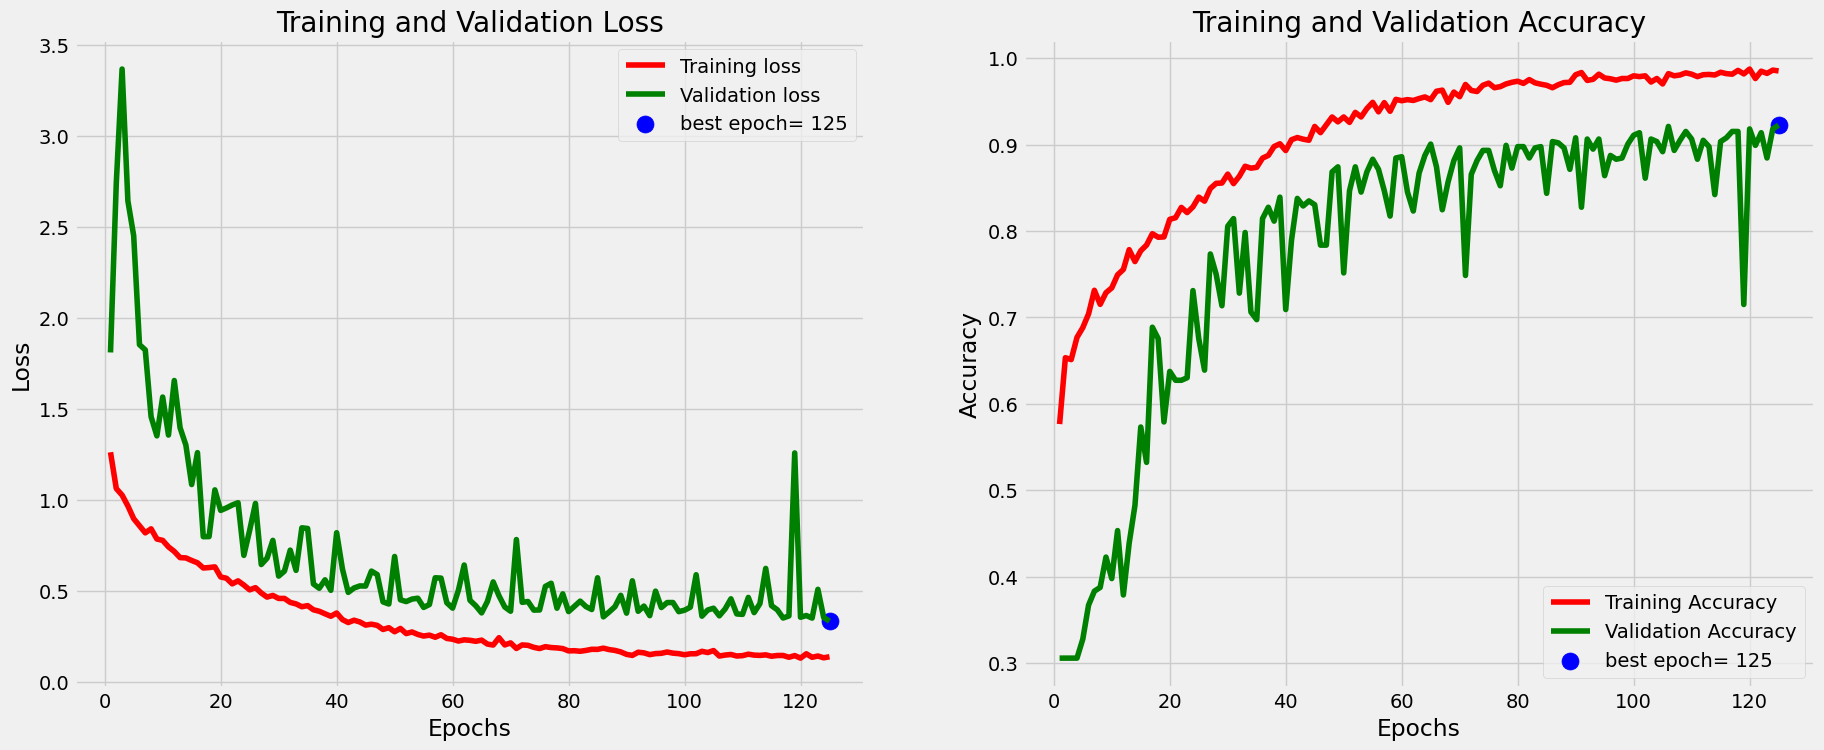

In [51]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()
plot_training(history)




Classification Report:
               precision    recall  f1-score   support

        CRVO       0.92      0.92      0.92       235
         DME       0.91      0.94      0.92       240
       OTHER       0.95      0.90      0.92       209

    accuracy                           0.92       684
   macro avg       0.92      0.92      0.92       684
weighted avg       0.92      0.92      0.92       684



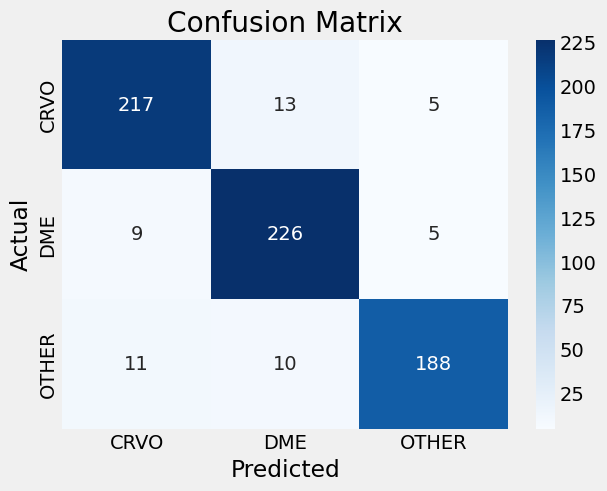

In [60]:

y_pred = best_model.predict(x_val) 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# طباعة التقرير التصنيفي

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


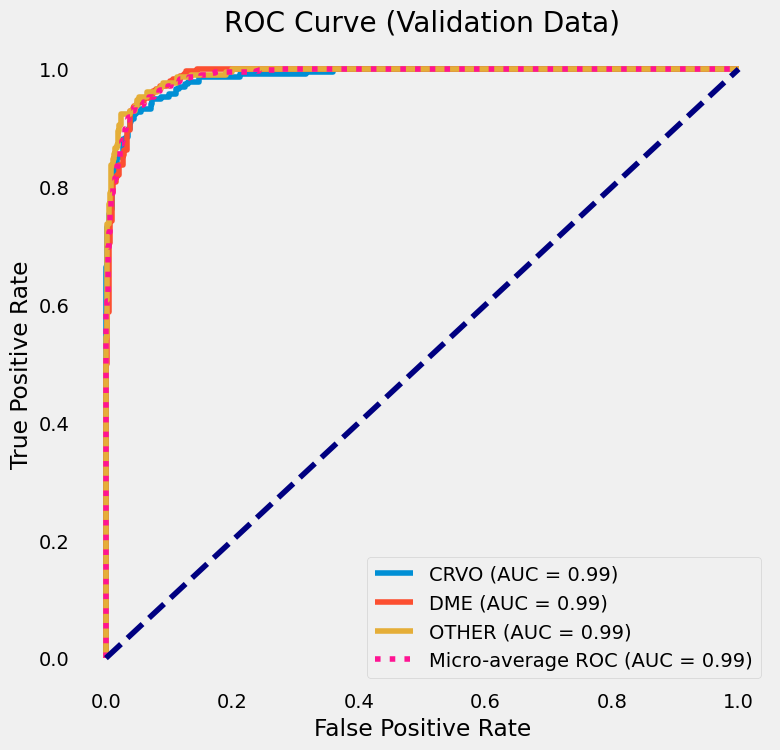

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# أسماء الفئات


# تحويل y_val إلى ترميز one-hot إذا كانت على شكل أرقام
if len(y_val.shape) == 1:
    y_val_onehot = label_binarize(y_val, classes=np.arange(len(class_names)))
else:
    y_val_onehot = y_val

# الحصول على احتمالات التنبؤ من النموذج
y_val_pred = best_model.predict(x_val)

# عدد الفئات
n_classes = y_val_onehot.shape[1]

# حساب منحنى ROC و AUC لكل فئة
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_onehot[:, i], y_val_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# حساب ROC للميكرو (micro-average)
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_onehot.ravel(), y_val_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# رسم منحنيات ROC
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})"
    )

# إضافة منحنى الميكرو
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})",
    color="deeppink", linestyle=":", linewidth=4
)

# خط القاعدة
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

plt.title("ROC Curve (Validation Data)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# تقييم النموذج على بيانات الاختبار

Classification Report:
               precision    recall  f1-score   support

        CRVO       0.92      0.90      0.91       235
         DME       0.92      0.95      0.94       240
       OTHER       0.91      0.89      0.90       209

    accuracy                           0.92       684
   macro avg       0.92      0.92      0.92       684
weighted avg       0.92      0.92      0.92       684



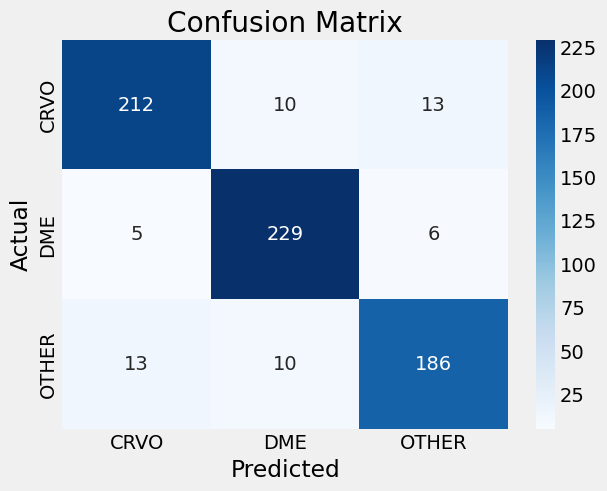

Model Accuracy: 0.91667


In [62]:
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# حساب الدقة بدقة الأعشار
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Model Accuracy: {accuracy:.5f}")  # طباعة الدقة حتى منزلة عشرية واحدة


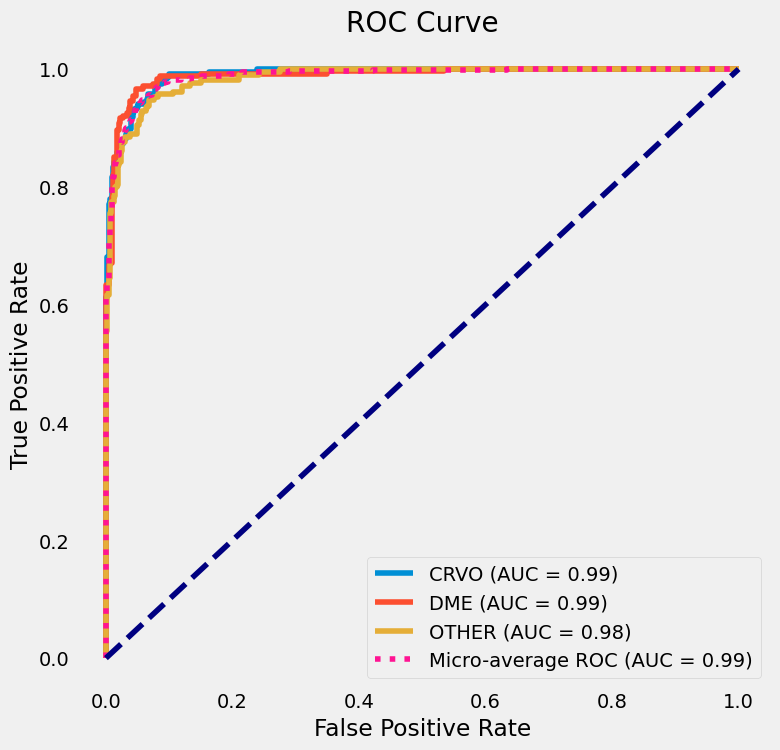

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np



# تحويل y_test إلى ترميز one-hot إذا كانت على شكل أرقام
if len(y_test.shape) == 1:
    y_test_onehot = label_binarize(y_test, classes=np.arange(len(class_names)))
else:
    y_test_onehot = y_test

# الحصول على احتمالات التنبؤ من النموذج
y_pred = best_model.predict(x_test)

# عدد الفئات
n_classes = y_test_onehot.shape[1]

# حساب منحنى ROC و AUC لكل فئة
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# حساب ROC للميكرو (micro-average)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# رسم منحنيات ROC
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})"
    )

# إضافة منحنى الميكرو
plt.plot(
    fpr["micro"], tpr["micro"],
    label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})",
    color="deeppink", linestyle=":", linewidth=4
)

# خط القاعدة
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# حفظ البيانات بعد التقسي


In [66]:

np.savez('Segmented_data.npz', x_train=x_train, y_train=y_train,x_val=x_val,y_val=y_val,x_test=x_test,y_test=y_test,class_names=class_names,num_classes=num_classes)


# حفظ النموذج

In [67]:
# حفظ النموذج باستخدام التنسيق الأصلي لـ Keras
best_model.save('model_1.keras')
